In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import fit_sigmoid, reg_lin, sigmoid
from IPython.display import clear_output

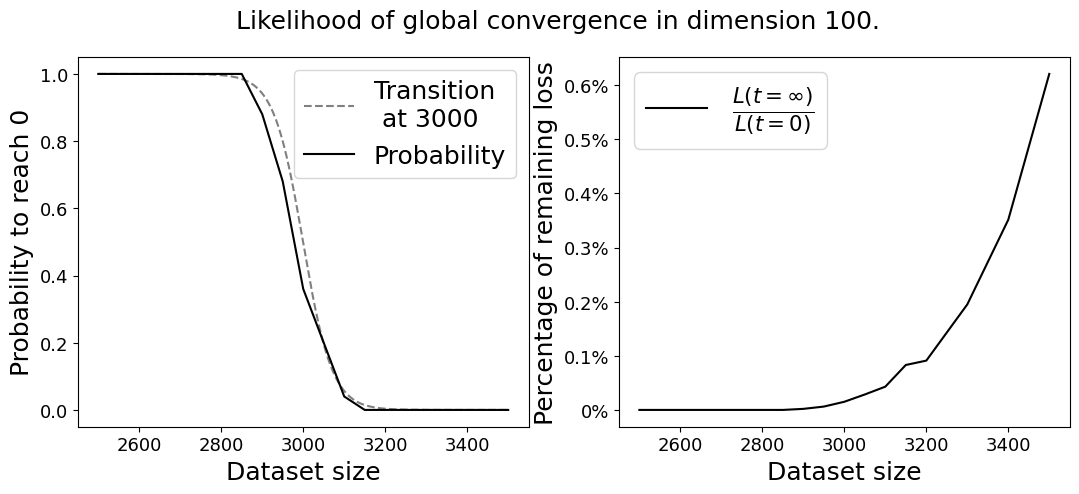

In [ ]:
"""EXP1: Plot the probability of convergence in dimension d=100.


"""

d=100
data = pd.read_csv(f'raw experiments/Data_exp_1_{d}.csv')

# In case we accidently stored tensors, which were converted to strings.
loss = data['loss_trend']
if type(loss[0]) == str:
    Loss_trend = [] # Since we stored the 'tensor(x)' instead of x.
    for s in loss:
        inside_parentheses = s.split("(")
        inside_parentheses = inside_parentheses[-1].rstrip(")")
        number = float(inside_parentheses)
        Loss_trend.append(number)
else:
    Loss_trend = loss


CV_Probability = data['CV_probability']
list_n = data['n']
CV_threshold = fit_sigmoid(list_n, CV_Probability)/2500
X = np.linspace(1, 35/25, 10000)
Y = sigmoid(-(X-CV_threshold)*70)

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12.8,4.8))
fontsize=18

ax[0].plot(2500*X, Y, linestyle="dashed", c="grey", label='Transition \n at 3000')
ax[0].plot(list_n, CV_Probability, c='k', label='Probability')
ax[0].set_ylabel("Probability to reach 0", fontsize=fontsize)
ax[0].set_xlabel("Dataset size", fontsize=fontsize)

ax[1].plot(list_n, Loss_trend, c='k', label=r"$\frac{L(t=\infty)}{L(t=0)}$")
ax[1].set_ylabel("Percentage of remaining loss", fontsize=fontsize)
ax[1].set_xlabel("Dataset size", fontsize=fontsize)

fig.suptitle(f"Likelihood of global convergence in dimension {d}.", fontsize=fontsize)
ax[0].legend(fontsize=18, loc='upper right')
ax[0].set_xticklabels(labels=ax[0].get_xticklabels(), fontsize=13)
ax[0].set_yticklabels(labels=ax[0].get_yticklabels(), fontsize=13)
ax[1].legend(fontsize=22)
ax[1].set_xticklabels(labels=ax[0].get_xticklabels(), fontsize=13)
ax[1].set_yticklabels(labels=["", "0%", "0.1%", "0.2%", "0.3%", "0.4%", "0.5%", "0.6%"], fontsize=13)
plt.savefig("Images/CV probability.png", dpi=600)
clear_output()
plt.show()

/Users/leodana/Desktop/Stage Inria Code/utils.py:23: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
/Users/leodana/Desktop/Stage Inria Code/utils.py:23: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
/Users/leodana/Desktop/Stage Inria Code/utils.py:23: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
/Users/leodana/Desktop/Stage Inria Code/utils.py:23: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
/Users/leodana/Desktop/Stage Inria Code/utils.py:23: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
/Users/leodana/Desktop/Stage Inria Code/utils.py:23: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
/Users/leodana/Desktop/Stage Inria Code/utils.py:23: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
/Users/leodana/Desktop/Stage Inria Code/utils.py:23: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
/Users/leodana/D

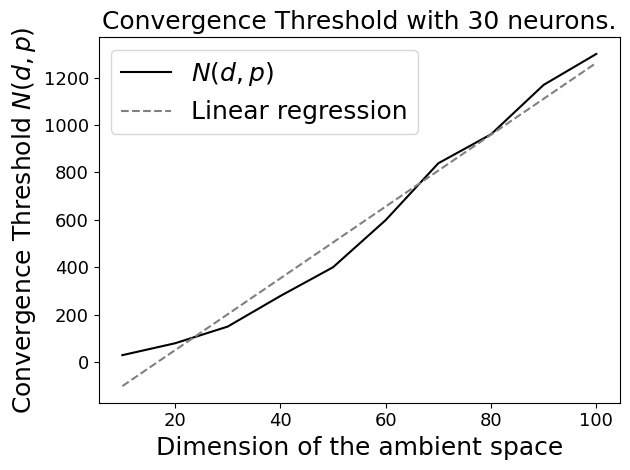

In [8]:
"""
EXP1
"""
threshold=[]
d_range = [d for d in range(10, 100+10, 10)]
for d in d_range:
    data = pd.read_csv(f'raw experiments/Data_exp_1_d_{d}.csv')

    loss = data['loss_trend']
    if type(loss[0]) == str:
        Loss = [] # Since we stored the 'tensor(x)' instead of x.
        for s in loss:
            inside_parentheses = s.split("(")
            inside_parentheses = inside_parentheses[-1].rstrip(",")
            number = float(inside_parentheses[0])
            Loss.append(number)
    else:
        Loss = loss

    proba = data['CV_probability']
    n = np.array(data['n'])/(data['n'][0])*80

    threshold.append(fit_sigmoid(n, proba)*data['n'][0]/80)

p=data['p'][0]
plt.plot(d_range, threshold, c='k', label=r"$N(d,p)$")
a, b, r = reg_lin(np.array(d_range), threshold)
plt.plot(d_range, a*np.array(d_range)+b, linestyle="dashed", c="grey", label="Linear regression")
plt.xlabel("Dimension of the ambient space", fontsize=18)
plt.ylabel(r"Convergence Threshold $N(d,p)$", fontsize=18)
plt.title(f"Convergence Threshold with {p} neurons.", fontsize=18)
plt.legend(fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.savefig("Images/Convergence_Threshold_d.png", dpi=800)
plt.show()

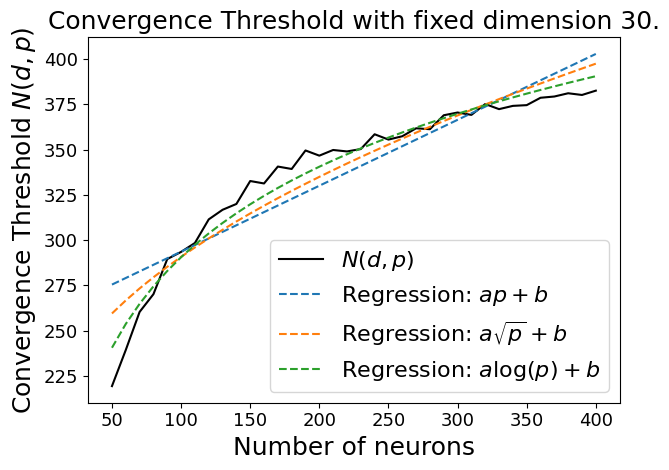

In [7]:
"""
EXP1
"""
threshold=[]
p_range = np.array([p for p in range(50, 400+10, 10)])
for p in p_range:
    data = pd.read_csv(f'raw experiments/Data_exp_1_p_{p}.csv')

    loss = data['loss_trend']
    if type(loss[0]) == str:
        Loss = [] # Since we stored the 'tensor(x)' instead of x.
        for s in loss:
            inside_parentheses = s.split("(")
            inside_parentheses = inside_parentheses[-1].rstrip(",")[0]
            number = float(inside_parentheses)
            Loss.append(number)
    else:
        Loss = loss

    proba = data['CV_probability']
    d = data['d'][0]
    n = np.array(data['n'])/(data['n'][0])*80

    threshold.append(fit_sigmoid(n, proba)*data['n'][0]/80)

plt.plot(p_range, threshold, c='k', label=r"$N(d,p)$")

a, b, r = reg_lin(p_range, threshold)
plt.plot(p_range, a*np.array(p_range)+b, c='C0', linestyle="dashed", label=r"Regression: $ap+b$")

sqrt_p_range = np.sqrt(np.array(p_range))
a, b, r = reg_lin(sqrt_p_range, threshold)
plt.plot(p_range, a*sqrt_p_range+b, c='C1', linestyle="dashed", label=r"Regression: $a\sqrt{p}+b$")

log_p_range = np.log(np.array(p_range))
a, b, r = reg_lin(log_p_range, threshold)
plt.plot(p_range, a*log_p_range+b, c='C2', linestyle="dashed", label=r"Regression: $a \log(p)+b$")

plt.xlabel("Number of neurons", fontsize=18)
plt.ylabel(r"Convergence Threshold $N(d,p)$", fontsize=18)
plt.title(f"Convergence Threshold with fixed dimension {d}.", fontsize=18)
plt.legend(fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.savefig("Images/Convergence_Threshold_p.png", dpi=600)
plt.show()

-0.5739966681955974
-0.5461058212552735
-0.5196842192428778
-0.5164767730404349


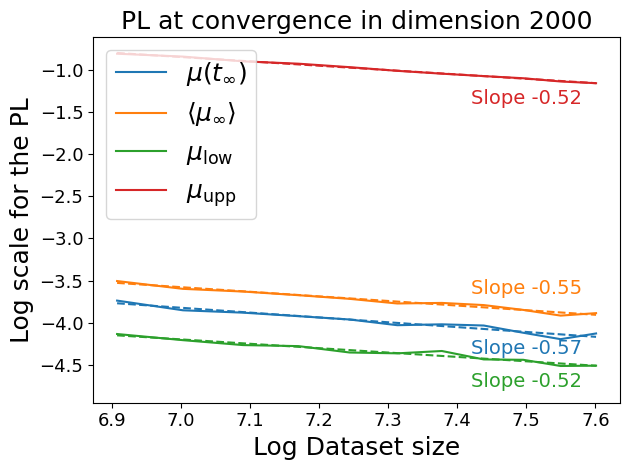

In [5]:
"""
EXP2
"""

data = pd.read_csv(f'raw experiments/Data_exp_2_log.csv')

d = data['d'][0]
list_n = data['n']
log_Speed = data['log_speed']
log_avg_Speed = data['log_avg_speed']
log_Lower = data['log_lower']
log_Upper = data['log_upper']


log_list_n = np.log(np.array(list_n))
a, b, r = reg_lin(log_list_n, log_Speed)
print(a)
plt.plot(log_list_n, log_Speed, label = r"$\mu(t_{\infty})$", c='C0')
plt.plot(log_list_n, [a*n+b for n in log_list_n], linestyle="dashed", c='C0')
plt.text(log_list_n[-1]-0.1, a*log_list_n[-1]+b-0.2, f"Slope {a:0{1}.{2}f}", fontsize=14, ha='center', c='C0')

a, b, r = reg_lin(log_list_n, log_avg_Speed)
print(a)
plt.plot(log_list_n, log_avg_Speed, label = r"$\langle \mu_{\infty}\rangle$", c='C1')
plt.plot(log_list_n, [a*n+b for n in log_list_n], linestyle="dashed", c='C1')
plt.text(log_list_n[-1]-0.1, a*log_list_n[-1]+b+0.25, f"Slope {a:0{1}.{2}f}", fontsize=14, ha='center', c='C1')

log_Lower = np.array(log_Lower)
a, b, r = reg_lin(log_list_n, log_Lower)
print(a)
plt.plot(log_list_n, log_Lower, label = r"$\mu_{\text{low}}$", c='C2')
plt.plot(log_list_n, [a*n+b for n in log_list_n], linestyle="dashed", c='C2')
plt.text(log_list_n[-1]-0.1, a*log_list_n[-1]+b-0.25, f"Slope {a:0{1}.{2}f}", fontsize=14, ha='center', c='C2')

a, b, r = reg_lin(log_list_n, log_Upper)
print(a)
plt.plot(log_list_n, log_Upper, label = r"$\mu_{\text{upp}}$", c='C3')
plt.plot(log_list_n, [a*n+b for n in log_list_n], linestyle="dashed", c='C3')
plt.text(log_list_n[-1]-0.1, a*log_list_n[-1]+b-0.25, f"Slope {a:0{1}.{2}f}", fontsize=14, ha='center', c='C3')

plt.xlabel("Log Dataset size", fontsize=18)
plt.ylabel("Log scale for the PL", fontsize=18)
plt.title(f"PL at convergence in dimension {d}", fontsize=18)
plt.legend(loc="upper left", fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
b,t = plt.ylim()
plt.ylim(b-0.25,t)
plt.tight_layout()
plt.savefig("Images/Asymptotic log_mean PL.png", dpi=600)
plt.show()